In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import pandas as pd

In [67]:
aggregated_table = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/evals/footprinting_350/embeddings/gena-lm-bert-large-t2t.tsv"
agg_data = pd.read_csv(aggregated_table, sep="\t", index_col=0)


In [68]:
motif_family_file = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/reference/H12CORE_motifs.tsv"
motif_family_data = pd.read_csv(motif_family_file, sep="\t", index_col=0)
agg_data["Family"] = motif_family_data["TF family"]

In [69]:
motif_family_data

,LOGO,Gene (human),Gene (mouse),Quality,Motif subtype,Quality.1,TF family,UniProt ID (human),UniProt ID (mouse)
Motif,,,,,,,,,
AHR.H12CORE.0.P.B,NaN,AHR,Ahr,B,0,P,PAS {1.2.5},AHR_HUMAN,AHR_MOUSE
AHRR.H12CORE.0.P.C,NaN,AHRR,Ahrr,C,0,P,PAS {1.2.5},AHRR_HUMAN,AHRR_MOUSE
ALX1.H12CORE.0.SM.B,NaN,ALX1,Alx1,B,0,S+M,Paired-related HD {3.1.3},ALX1_HUMAN,ALX1_MOUSE
ALX3.H12CORE.0.SM.B,NaN,ALX3,Alx3,B,0,S+M,Paired-related HD {3.1.3},ALX3_HUMAN,ALX3_MOUSE
ALX3.H12CORE.1.S.B,NaN,ALX3,Alx3,B,1,S,Paired-related HD {3.1.3},ALX3_HUMAN,ALX3_MOUSE
...,...,...,...,...,...,...,...,...,...
ZSC29.H12CORE.1.M.C,NaN,ZSCAN29,NaN,C,1,M,More than 3 adjacent zinc fingers {2.3.3},ZSC29_HUMAN,NaN
ZSC31.H12CORE.0.P.C,NaN,ZSCAN31,NaN,C,0,P,More than 3 adjacent zinc fingers {2.3.3},ZSC31_HUMAN,NaN
ZSC31.H12CORE.1.SM.B,NaN,ZSCAN31,NaN,B,1,S+M,More than 3 adjacent zinc fingers {2.3.3},ZSC31_HUMAN,NaN


Text(0, 0.5, 'Motif Count')

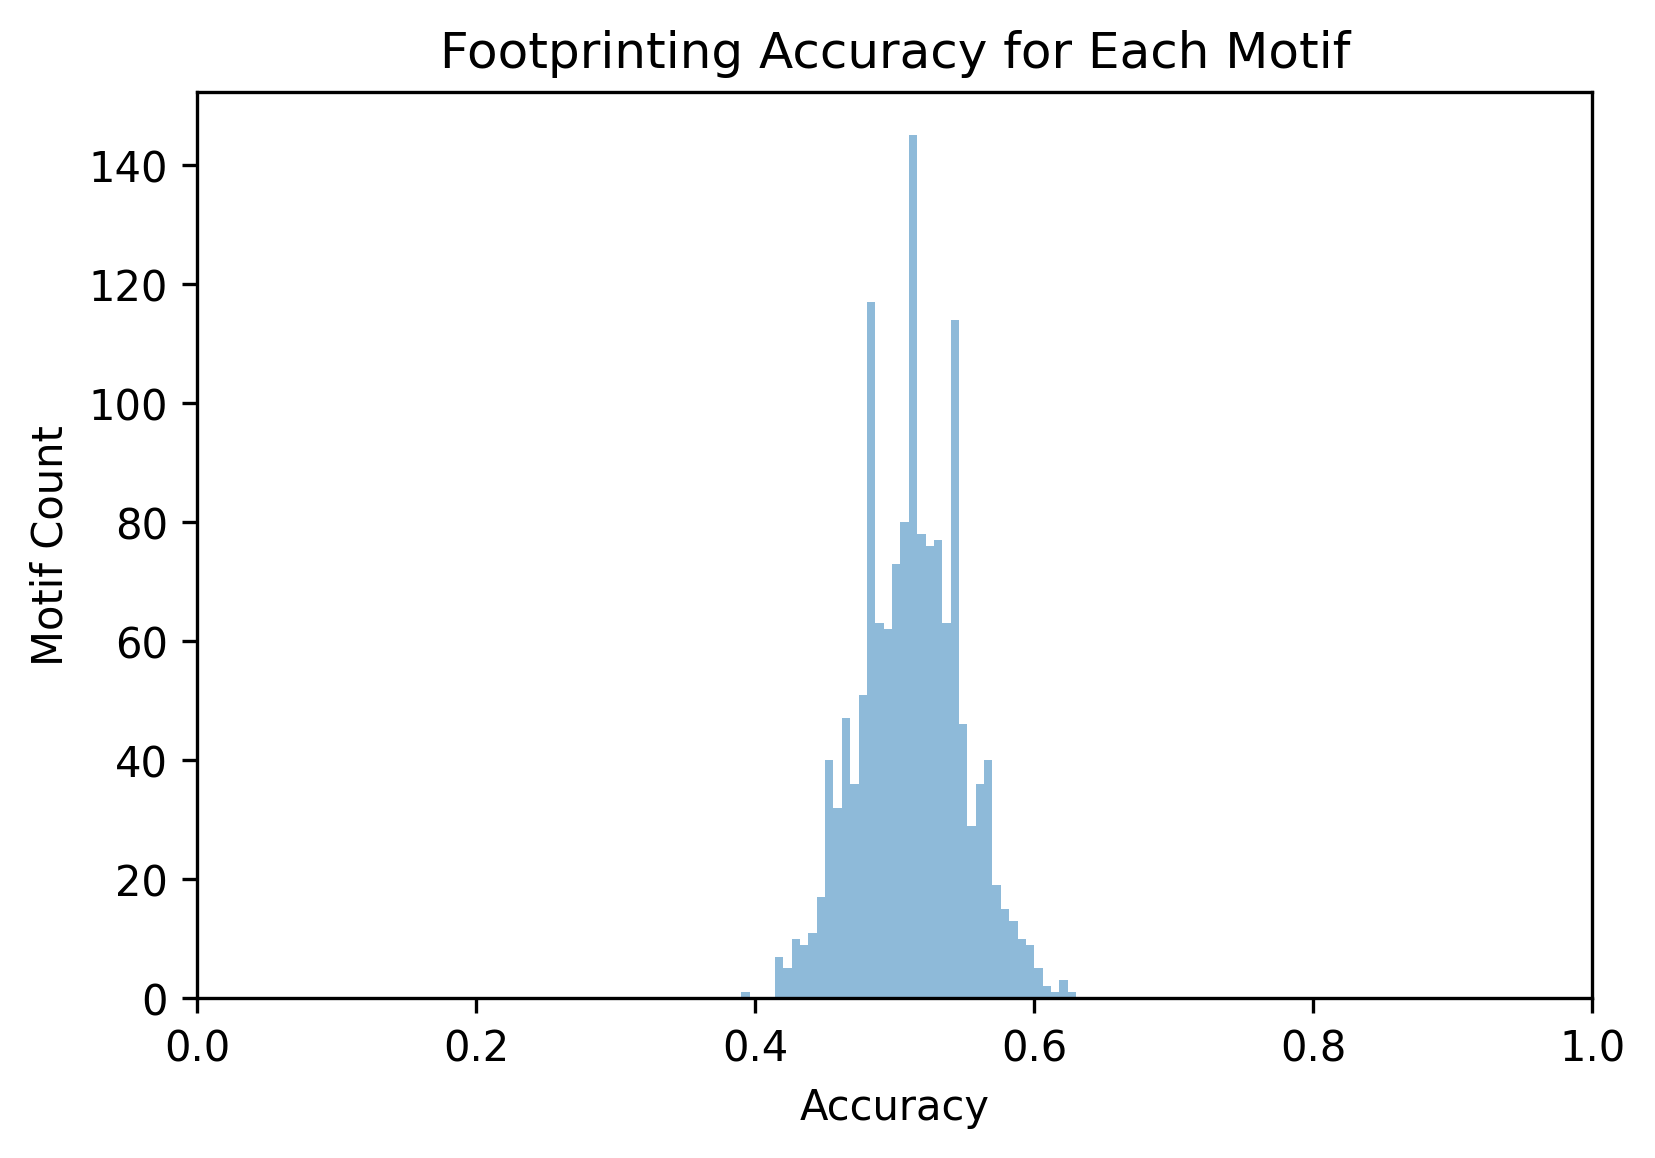

In [70]:
plt.figure(dpi=300)
plt.hist(agg_data["Accuracy"], bins=40, alpha=0.5)
plt.title("Footprinting Accuracy for Each Motif")
plt.xlabel("Accuracy")
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylabel("Motif Count")

In [71]:
family_acc_means = agg_data.groupby("Family")["Accuracy"].mean()
family_acc_vars = agg_data.groupby("Family")["Accuracy"].apply(lambda x: np.var(x))


In [72]:
mean_order = family_acc_means.sort_values().index.values

In [73]:
acc_vals, acc_labels, lengths = [], [], []
for family in mean_order:
    cur_accs = agg_data.loc[agg_data["Family"] == family]["Accuracy"].values
    if len(cur_accs) < 10:
        continue
    acc_vals.append(cur_accs)
    lengths.append(len(cur_accs))
    acc_labels.append(family.split(" {")[0] + f" ({len(cur_accs)})")

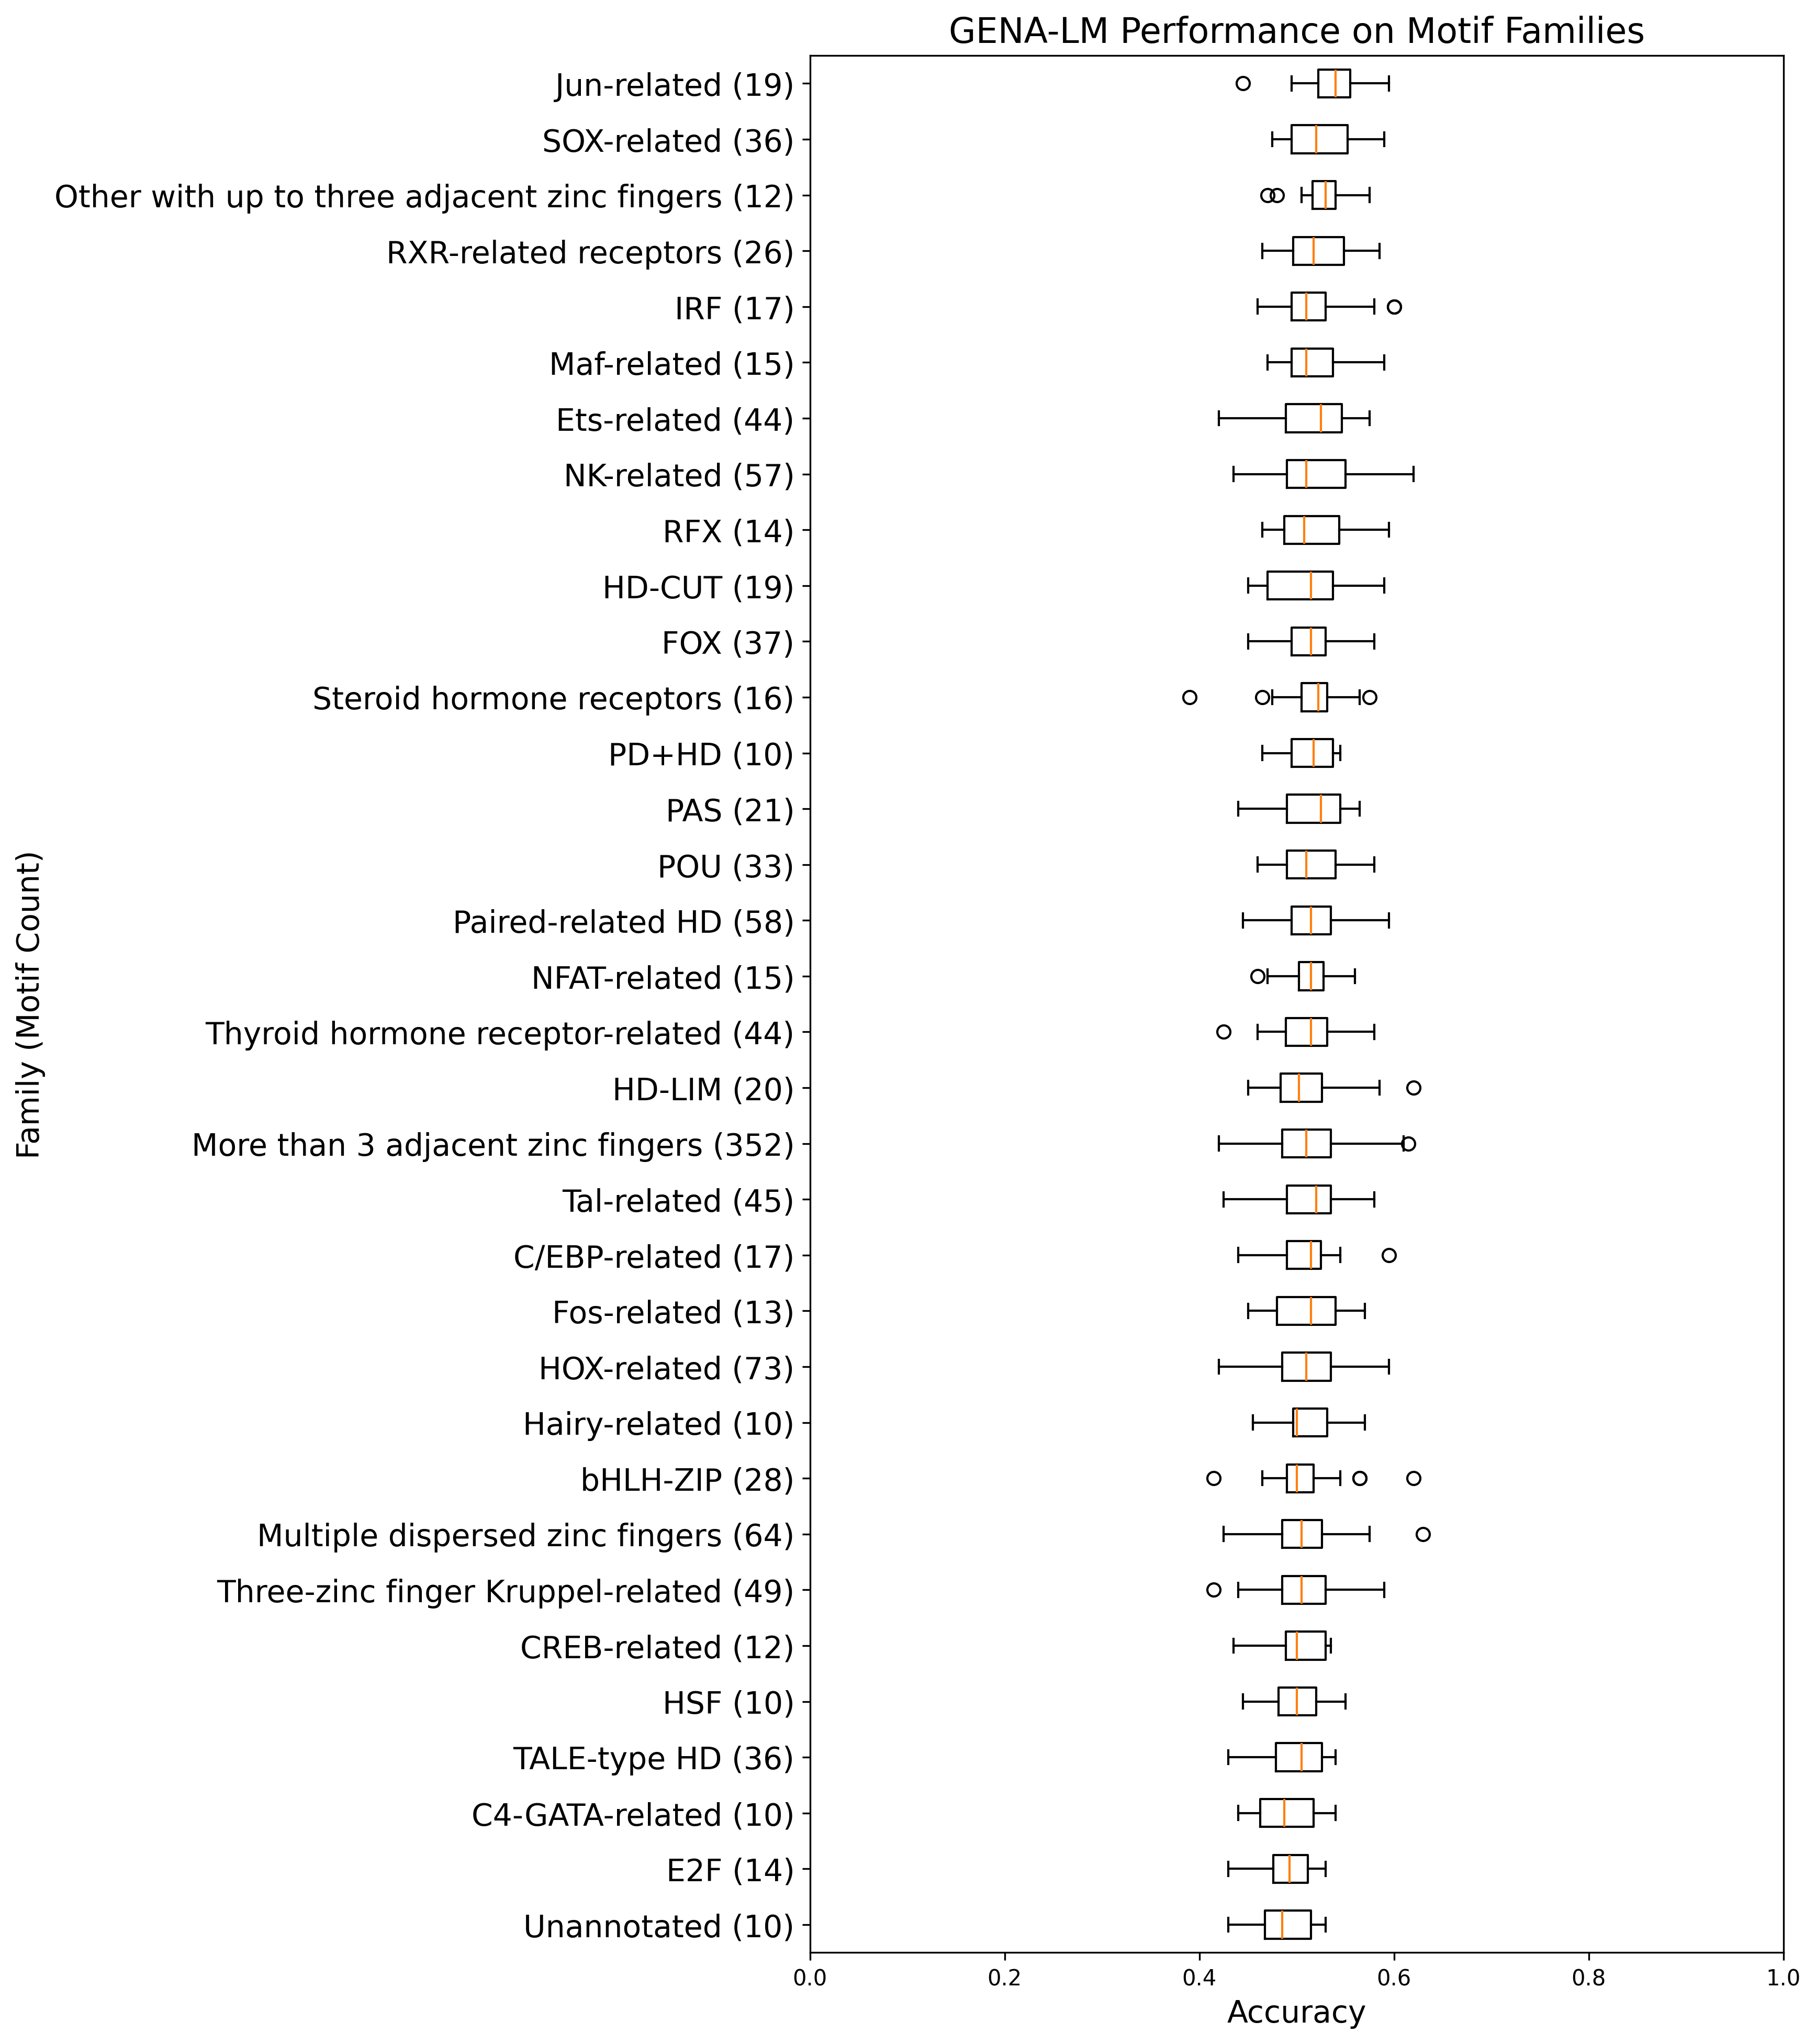

In [75]:
plt.figure(dpi=300, figsize=[8,16])
plt.boxplot(acc_vals, vert=False, labels=acc_labels)
plt.title("GENA-LM Performance on Motif Families", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel("Family (Motif Count)", fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
np.quantile(agg_data["Accuracy"], 0), np.quantile(agg_data["Accuracy"], 0.25), np.quantile(agg_data["Accuracy"], 0.5), np.quantile(agg_data["Accuracy"], 0.75), np.quantile(agg_data["Accuracy"], 1)


(0.39, 0.48, 0.505, 0.53, 0.615)

In [36]:
mean_order

array(['PD {3.2.2}', 'GMEB {5.3.3}', 'Dbp {9.1.1}', 'LRRFIP {0.3.1}',
       'GCM {7.2.1}', 'C/EBP-related {1.1.8}', 'Myb/SANT domain {3.5.1}',
       'HOX-related {3.1.1}', 'NFAT-related {6.1.3}',
       'BED zinc finger {2.3.5}', 'E2F {3.3.2}',
       'Other with up to three adjacent zinc fingers {2.3.2}',
       'PD+HD {3.2.1}', 'Paired-related HD {3.1.3}',
       'XBP1-related {1.1.5}', 'C4-GATA-related {2.2.1}',
       'HD-LIM {3.1.5}', 'MYT {2.7.1}', 'Grainyhead-related {6.7.1}',
       'HD-CUT {3.1.9}', 'HSF {3.4.1}', 'HD-SINE {3.1.6}',
       'NK-related {3.1.2}', 'HMGA {8.2.1}', 'Unannotated {0.0.9}',
       'B-ATF-related {1.1.4}', 'ARID-related {3.7.1}',
       'ATF4-related {1.1.6}', 'CSL-related {6.1.4}', 'DMRT {2.5.1}',
       'TBP-related {8.1.1}', 'Ets-related {3.5.2}', 'HD-PROS {3.1.7}',
       'THAP {2.9.1}', 'SOX-related {4.1.1}', 'Fos-related {1.1.2}',
       'Maf-related {1.1.3}', 'POU {3.1.10}', 'Runt-related {6.4.1}',
       'FOX {3.3.1}', 'PAS {1.2.5}',
       '

In [37]:
(agg_data["Accuracy"] > 0.5).values.sum()

1052